In [1]:
import timeit
import os
import json
import numpy as np
import scipy as sp
from scipy.stats import zscore
import periodicity_detection as period
import time

from src.OnlineSLE.IIAI_synthetic import sinewave
import pandas as pd
import src.utility.utility_frequency_analysis as sDFT
from src.utility.utility import update_array
import matplotlib.pyplot as plt

## Full length data

In [2]:
np.random.seed(0)
seasonal = sinewave(25000,100,1)
residual = 0.2 * np.random.randn(len(seasonal))
ts = zscore(seasonal+ residual)

window_sizes = range(300,10000,200)
print(window_sizes)
com_time = []
num_sliding_window = 10000

range(300, 10000, 200)


In [3]:
## FFT

for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = np.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = np.fft.fft(buffer)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
        end_time = time.time()
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'numpy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'numpy.FFT', 'window_size': 300, 'avg_time': 0.013399243354797363}
{'algorithm': 'numpy.FFT', 'window_size': 500, 'avg_time': 0.017642307281494143}
{'algorithm': 'numpy.FFT', 'window_size': 700, 'avg_time': 0.023192548751831056}
{'algorithm': 'numpy.FFT', 'window_size': 900, 'avg_time': 0.02396671772003174}
{'algorithm': 'numpy.FFT', 'window_size': 1100, 'avg_time': 0.02775712013244629}
{'algorithm': 'numpy.FFT', 'window_size': 1300, 'avg_time': 0.03704316616058349}
{'algorithm': 'numpy.FFT', 'window_size': 1500, 'avg_time': 0.03421869277954101}
{'algorithm': 'numpy.FFT', 'window_size': 1700, 'avg_time': 0.0490574836730957}
{'algorithm': 'numpy.FFT', 'window_size': 1900, 'avg_time': 0.16780526638031004}
{'algorithm': 'numpy.FFT', 'window_size': 2100, 'avg_time': 0.05851871967315674}
{'algorithm': 'numpy.FFT', 'window_size': 2300, 'avg_time': 0.05557272434234619}
{'algorithm': 'numpy.FFT', 'window_size': 2500, 'avg_time': 0.05152983665466308}
{'algorithm': 'numpy.FFT', 'wi

In [4]:

for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sp.fft.fft(buffer)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
        end_time = time.time()
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'scipy.FFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'scipy.FFT', 'window_size': 300, 'avg_time': 0.01569359302520752}
{'algorithm': 'scipy.FFT', 'window_size': 500, 'avg_time': 0.018161582946777343}
{'algorithm': 'scipy.FFT', 'window_size': 700, 'avg_time': 0.02215876579284668}
{'algorithm': 'scipy.FFT', 'window_size': 900, 'avg_time': 0.024422526359558105}
{'algorithm': 'scipy.FFT', 'window_size': 1100, 'avg_time': 0.027876615524291992}
{'algorithm': 'scipy.FFT', 'window_size': 1300, 'avg_time': 0.0307422399520874}
{'algorithm': 'scipy.FFT', 'window_size': 1500, 'avg_time': 0.03286182880401611}
{'algorithm': 'scipy.FFT', 'window_size': 1700, 'avg_time': 0.03685872554779053}
{'algorithm': 'scipy.FFT', 'window_size': 1900, 'avg_time': 0.0399592399597168}
{'algorithm': 'scipy.FFT', 'window_size': 2100, 'avg_time': 0.04329707622528076}
{'algorithm': 'scipy.FFT', 'window_size': 2300, 'avg_time': 0.04412977695465088}
{'algorithm': 'scipy.FFT', 'window_size': 2500, 'avg_time': 0.04703352451324463}
{'algorithm': 'scipy.FFT', 'win

In [5]:

for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = np.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sDFT.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SDFT',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SDFT', 'window_size': 300, 'avg_time': 0.012439560890197755}
{'algorithm': 'SDFT', 'window_size': 500, 'avg_time': 0.014876389503479004}
{'algorithm': 'SDFT', 'window_size': 700, 'avg_time': 0.016797089576721193}
{'algorithm': 'SDFT', 'window_size': 900, 'avg_time': 0.018046045303344728}
{'algorithm': 'SDFT', 'window_size': 1100, 'avg_time': 0.02002737522125244}
{'algorithm': 'SDFT', 'window_size': 1300, 'avg_time': 0.02174816131591797}
{'algorithm': 'SDFT', 'window_size': 1500, 'avg_time': 0.02335953712463379}
{'algorithm': 'SDFT', 'window_size': 1700, 'avg_time': 0.025043725967407227}
{'algorithm': 'SDFT', 'window_size': 1900, 'avg_time': 0.026695919036865235}
{'algorithm': 'SDFT', 'window_size': 2100, 'avg_time': 0.028667950630187986}
{'algorithm': 'SDFT', 'window_size': 2300, 'avg_time': 0.02987971305847168}
{'algorithm': 'SDFT', 'window_size': 2500, 'avg_time': 0.03148629665374756}
{'algorithm': 'SDFT', 'window_size': 2700, 'avg_time': 0.03301348686218262}
{'algorit

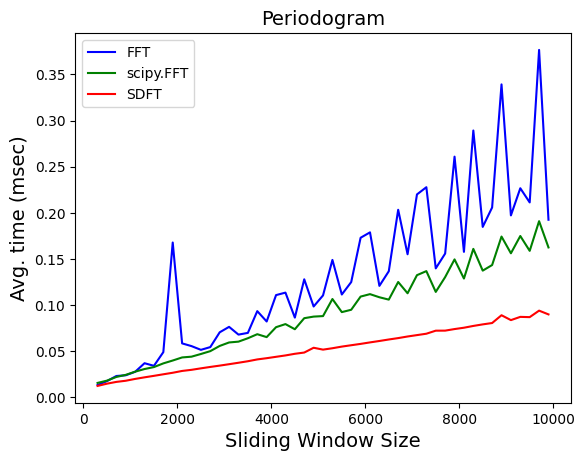

In [7]:
df = pd.DataFrame(com_time)
subset = df[df['algorithm'] == 'numpy.FFT']
plt.plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='blue', label='FFT')
subset = df[df['algorithm'] == 'scipy.FFT']
plt.plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='green', label='scipy.FFT')
subset = df[df['algorithm'] == 'SDFT']
plt.plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='red', label='SDFT')
plt.xlabel('Sliding Window Size', fontsize=14)
plt.ylabel('Avg. time (msec)', fontsize=14) 
plt.title('Periodogram', fontsize=14)
plt.legend()

In [26]:
num_sliding_window = 1000
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.find_length(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'FindLength',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'FindLength', 'window_size': 300, 'avg_time': 0.0495758056640625}
{'algorithm': 'FindLength', 'window_size': 500, 'avg_time': 0.052751779556274414}
{'algorithm': 'FindLength', 'window_size': 700, 'avg_time': 0.06226086616516114}
{'algorithm': 'FindLength', 'window_size': 900, 'avg_time': 0.06913137435913086}
{'algorithm': 'FindLength', 'window_size': 1100, 'avg_time': 0.0755765438079834}
{'algorithm': 'FindLength', 'window_size': 1300, 'avg_time': 0.08004450798034668}
{'algorithm': 'FindLength', 'window_size': 1500, 'avg_time': 0.0802621841430664}
{'algorithm': 'FindLength', 'window_size': 1700, 'avg_time': 0.09466671943664551}
{'algorithm': 'FindLength', 'window_size': 1900, 'avg_time': 0.09665060043334961}
{'algorithm': 'FindLength', 'window_size': 2100, 'avg_time': 0.11118602752685547}
{'algorithm': 'FindLength', 'window_size': 2300, 'avg_time': 0.1134195327758789}
{'algorithm': 'FindLength', 'window_size': 2500, 'avg_time': 0.11910104751586914}
{'algorithm': 'FindLeng

In [27]:
## Quni2

for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    #Quinn
    location, peak_index = sDFT.get_period_hints(p_den)
    quin_k_peak, quin_frequency_tone = sDFT.quin2_estimator(start_fft,peak_index, xfreq[1]-xfreq[0])
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sDFT.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft)
        location, peak_index = sDFT.get_period_hints(p_den)
        quin_k_peak, quin_frequency_tone = sDFT.quin2_estimator(start_fft, peak_index, xfreq[1] - xfreq[0])
        end_time = time.time()
        total_time += (end_time - start_time)
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE (Quinn)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE (Quinn)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 300, 'avg_time': 0.0468752384185791}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 500, 'avg_time': 0.047757625579833984}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 700, 'avg_time': 0.051316022872924805}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 900, 'avg_time': 0.05279850959777832}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 1100, 'avg_time': 0.05681157112121582}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 1300, 'avg_time': 0.057099342346191406}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 1500, 'avg_time': 0.05782938003540039}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 1700, 'avg_time': 0.06199193000793456}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 1900, 'avg_time': 0.0638277530670166}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 2100, 'avg_time': 0.06566882133483887}
{'algorithm': 'OnlineSLE (Quinn)', 'window_size': 2300, 'avg_time': 0.0705270767211914}
{'algorithm': 'OnlineSLE 

In [28]:
## QSE
for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    location, peak_index = sDFT.get_period_hints(p_den)
    qse_k_peak, qse_frequency_tone = sDFT.qse(buffer, peak_index, xfreq[1] - xfreq[0])
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sDFT.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
        location, peak_index = sDFT.get_period_hints(p_den)
        qse_k_peak, qse_frequency_tone = sDFT.qse(buffer, peak_index, xfreq[1] - xfreq[0])
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE (QSE)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE (QSE)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE (QSE)', 'window_size': 300, 'avg_time': 0.093902587890625}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 500, 'avg_time': 0.11083364486694336}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 700, 'avg_time': 0.13072872161865234}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 900, 'avg_time': 0.14408588409423828}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 1100, 'avg_time': 0.16166043281555176}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 1300, 'avg_time': 0.18153762817382812}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 1500, 'avg_time': 0.19518661499023438}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 1700, 'avg_time': 0.21746468544006348}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 1900, 'avg_time': 0.2321939468383789}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 2100, 'avg_time': 0.25115180015563965}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 2300, 'avg_time': 0.2687695026397705}
{'algorithm': 'OnlineSLE (QSE)', 'window_size': 250

In [29]:
for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    location, peak_index = sDFT.get_period_hints(p_den)
    qse_k_peak, qse_frequency_tone = sDFT.qse(buffer, peak_index, xfreq[1] - xfreq[0])
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sDFT.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
        haqse_k_peak, qse_frequency_tone = sDFT.haqse(p_den, buffer)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE (HAQSE)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE (HAQSE)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 300, 'avg_time': 0.07839012145996094}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 500, 'avg_time': 0.0879354476928711}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 700, 'avg_time': 0.1033165454864502}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 900, 'avg_time': 0.1158761978149414}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 1100, 'avg_time': 0.1254129409790039}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 1300, 'avg_time': 0.1379377841949463}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 1500, 'avg_time': 0.15118074417114258}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 1700, 'avg_time': 0.161146879196167}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 1900, 'avg_time': 0.17409491539001465}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 2100, 'avg_time': 0.18862533569335938}
{'algorithm': 'OnlineSLE (HAQSE)', 'window_size': 2300, 'avg_time': 0.200592041015625}
{'algorithm': 'OnlineSLE (HAQSE)',

In [30]:
for window_size in window_sizes:
    total_time = 0
    buffer = ts[:window_size]
    start_fft = sp.fft.fft(buffer)
    xfreq, p_den = sDFT.peridogram(window_size, start_fft, 'rec')
    location, peak_index = sDFT.get_period_hints(p_den)
    N = len(start_fft)
    k = np.arange(N)
    twiddle = np.exp(2j * np.pi * k / N)
    for idx in range(0,num_sliding_window):
        newest_x = ts[window_size+idx]
        oldest_x = buffer[0]
        buffer = update_array(buffer, ts[window_size + idx])
        start_time = time.time()
        start_fft = sDFT.update_sDFT(start_fft, oldest_x, newest_x, twiddle)
        xfreq, p_den = sDFT.peridogram(window_size, start_fft)
        location, peak_index = sDFT.get_period_hints(p_den)
        end_time = time.time()
        total_time += (end_time - start_time)

    
    avg_time_ms = (total_time / num_sliding_window) * 1000

    print({'algorithm': 'OnlineSLE (None)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'OnlineSLE (None)',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'OnlineSLE (None)', 'window_size': 300, 'avg_time': 0.043624162673950195}
{'algorithm': 'OnlineSLE (None)', 'window_size': 500, 'avg_time': 0.044002532958984375}
{'algorithm': 'OnlineSLE (None)', 'window_size': 700, 'avg_time': 0.04608321189880371}
{'algorithm': 'OnlineSLE (None)', 'window_size': 900, 'avg_time': 0.048716068267822266}
{'algorithm': 'OnlineSLE (None)', 'window_size': 1100, 'avg_time': 0.05309867858886719}
{'algorithm': 'OnlineSLE (None)', 'window_size': 1300, 'avg_time': 0.053328752517700195}
{'algorithm': 'OnlineSLE (None)', 'window_size': 1500, 'avg_time': 0.055051326751708984}
{'algorithm': 'OnlineSLE (None)', 'window_size': 1700, 'avg_time': 0.056404829025268555}
{'algorithm': 'OnlineSLE (None)', 'window_size': 1900, 'avg_time': 0.06002187728881836}
{'algorithm': 'OnlineSLE (None)', 'window_size': 2100, 'avg_time': 0.06179213523864746}
{'algorithm': 'OnlineSLE (None)', 'window_size': 2300, 'avg_time': 0.06487917900085449}
{'algorithm': 'OnlineSLE (None

In [31]:
for window_size in window_sizes:
    total_time = 0  # To accumulate the total execution time of period.find_length(buffer)
    #
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        start_time = time.time()
        SLE_result = period.autoperiod(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'AutoPeriod',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'AutoPeriod', 'window_size': 300, 'avg_time': 5.616142272949219}
{'algorithm': 'AutoPeriod', 'window_size': 500, 'avg_time': 5.440037250518799}
{'algorithm': 'AutoPeriod', 'window_size': 700, 'avg_time': 6.091551303863525}
{'algorithm': 'AutoPeriod', 'window_size': 900, 'avg_time': 6.464000701904297}
{'algorithm': 'AutoPeriod', 'window_size': 1100, 'avg_time': 6.771409273147583}
{'algorithm': 'AutoPeriod', 'window_size': 1300, 'avg_time': 7.1170594692230225}
{'algorithm': 'AutoPeriod', 'window_size': 1500, 'avg_time': 7.472155809402466}
{'algorithm': 'AutoPeriod', 'window_size': 1700, 'avg_time': 8.003970384597778}
{'algorithm': 'AutoPeriod', 'window_size': 1900, 'avg_time': 8.352235794067383}
{'algorithm': 'AutoPeriod', 'window_size': 2100, 'avg_time': 8.499335527420044}
{'algorithm': 'AutoPeriod', 'window_size': 2300, 'avg_time': 9.18019413948059}
{'algorithm': 'AutoPeriod', 'window_size': 2500, 'avg_time': 9.724067687988281}
{'algorithm': 'AutoPeriod', 'window_size': 2

### Please check 'sazedR' from CRAN https://cran.r-project.org/  
## please install R programming

In [32]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
sazedR = importr('sazedR')          # sazedR in CRAN

for window_size in window_sizes:
    total_time = 0
    for idx in range(0,num_sliding_window):
        W = ts[idx:window_size + idx]
        W = robjects.FloatVector(W)
        start_time = time.time()
        SLE_result = sazedR.sazed(W)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_ms = (total_time / num_sliding_window) * 1000
    print({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})
    com_time.append({'algorithm': 'SAZED',
                    'window_size': window_size,
                    'avg_time': avg_time_ms})

{'algorithm': 'SAZED', 'window_size': 300, 'avg_time': 2.9981472492218018}
{'algorithm': 'SAZED', 'window_size': 500, 'avg_time': 3.2016489505767822}
{'algorithm': 'SAZED', 'window_size': 700, 'avg_time': 4.0338335037231445}
{'algorithm': 'SAZED', 'window_size': 900, 'avg_time': 4.26573371887207}
{'algorithm': 'SAZED', 'window_size': 1100, 'avg_time': 5.758002519607544}
{'algorithm': 'SAZED', 'window_size': 1300, 'avg_time': 6.107941150665283}
{'algorithm': 'SAZED', 'window_size': 1500, 'avg_time': 6.532781600952148}
{'algorithm': 'SAZED', 'window_size': 1700, 'avg_time': 7.632766008377075}
{'algorithm': 'SAZED', 'window_size': 1900, 'avg_time': 7.3995513916015625}
{'algorithm': 'SAZED', 'window_size': 2100, 'avg_time': 9.769065141677856}
{'algorithm': 'SAZED', 'window_size': 2300, 'avg_time': 10.18768858909607}
{'algorithm': 'SAZED', 'window_size': 2500, 'avg_time': 11.027960062026978}
{'algorithm': 'SAZED', 'window_size': 2700, 'avg_time': 13.076593160629272}
{'algorithm': 'SAZED', '

In [33]:
df = pd.DataFrame(com_time)
df.to_csv('ch4_timecom_noauto.csv')

/var/folders/39/cpb13rr53hx1nyfrgqhk18pc0000gn/T/ipykernel_8386/1485116397.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(algorithms))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


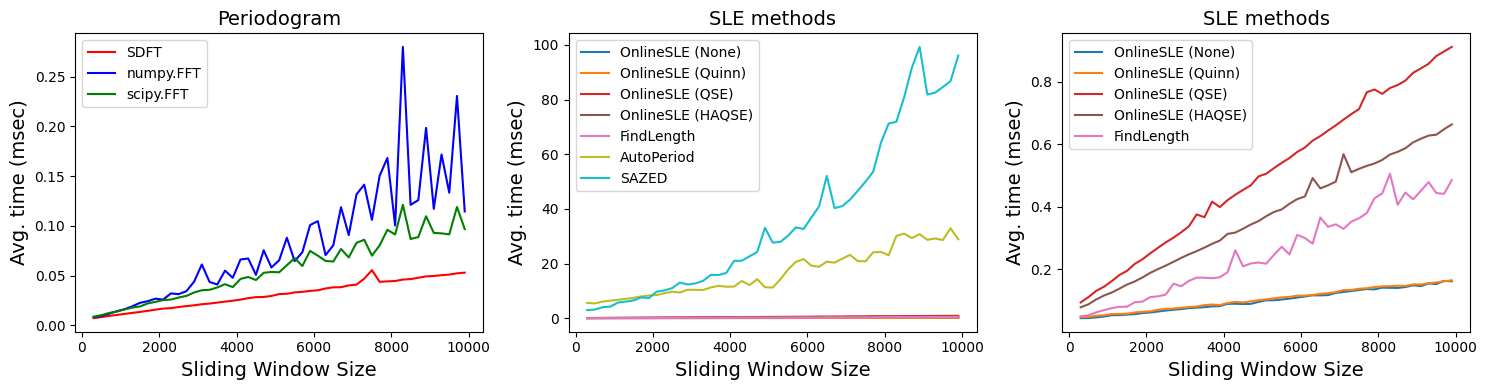

In [34]:
algorithms = ['OnlineSLE (None)', 'OnlineSLE (Quinn)','OnlineSLE (QSE)', 'OnlineSLE (HAQSE)','FindLength','AutoPeriod', 'SAZED']
colors = plt.cm.get_cmap('tab10', len(algorithms))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))


subset = df[df['algorithm'] == 'SDFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='red', label='SDFT')
subset = df[df['algorithm'] == 'numpy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='blue', label='numpy.FFT')
subset = df[df['algorithm'] == 'scipy.FFT']
axs[0].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color='green', label='scipy.FFT')

axs[0].set_xlabel('Sliding Window Size', fontsize=14)
axs[0].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[0].set_title('Periodogram', fontsize=14)
axs[0].legend()

for i, algorithm in enumerate(algorithms):
    subset = df[df['algorithm'] == algorithm]
    axs[1].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[1].set_xlabel('Sliding Window Size', fontsize=14)
axs[1].set_ylabel('Avg. time (msec)', fontsize=14)
axs[1].set_title('SLE methods', fontsize=14)
axs[1].legend()

for i, algorithm in enumerate(algorithms[:5]):
    subset = df[df['algorithm'] == algorithm]
    axs[2].plot(subset['window_size'], subset['avg_time'], linestyle='-', 
             color=colors(i), label=algorithm)

# plt.title('Accuracy Rate (Fig5a)', fontsize=16)
axs[2].set_xlabel('Sliding Window Size', fontsize=14)
axs[2].set_ylabel('Avg. time (msec)', fontsize=14) 
axs[2].set_title('SLE methods', fontsize=14)
axs[2].legend()

plt.tight_layout()
plt.savefig('acc_time.eps',format='eps')

/var/folders/39/cpb13rr53hx1nyfrgqhk18pc0000gn/T/ipykernel_8386/304218991.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(algorithms))


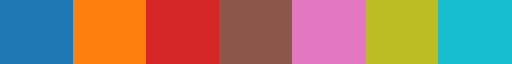

In [35]:
colors = plt.cm.get_cmap('tab10', len(algorithms))
colors